In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [49]:
# Read the Excel file
data = pd.read_excel('derecho.xlsx')

data.head()

# 1. EN LA PRIMERA SEMANA DE CLASES, ¿EL DOCENTE PRESENTÓ Y EXPLICÓ SU PLAN DE ASIGNATURA?

,Marca temporal,Dirección de correo electrónico,Puntuación,ID DOCENTE,DOCENTE,ASIGNATURA,PARALELO,"1. EN LA PRIMERA SEMANA DE CLASES, ¿EL DOCENTE PRESENTÓ Y EXPLICÓ SU PLAN DE ASIGNATURA?",2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.],2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Promueve un ambiente cordial y de respeto mutuo.],2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Demuestra disponibilidad y apertura para responder a dudas y/o consultas.],2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Cumple con la planificación de la clase.],"2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [El desarrollo de la clase es ordenado, estructurado y se relaciona con lo avanzado.]",2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Aplica estrategias y técnicas que ayudan a comprender mejor los contenidos.],2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Sus explicaciones son claras y refuerzan lo aprendido.],2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Asigna tareas y/o actividades que me preparan para tener un rendimiento satisfactorio en la asignatura.],"2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Constantemente brinda retroalimentación/información precisa, oportuna y constructiva de mis logros, fortalezas, debilidades y aspectos a mejorar, que me ayudan a progresar en mi desempeño académico.]","3. EN GENERAL, ¿CÓMO EVALUARÍAS EL DESEMPEÑO DEL DOCENTE?",4. MENCIONA ASPECTOS POSITIVOS Y/O ASPECTOS EN LOS QUE EL DOCENTE NECESITA TRABAJAR PARA MEJORAR SU DESEMPEÑO.
0,2025-03-20 08:22:07.620,leonardo.perez.a@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Es muy animado
1,2025-03-20 08:22:12.878,franco.luna@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Excelente,Amable
2,2025-03-20 08:23:20.625,arian.pelaez@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,el mejor en lo que hace
3,2025-03-20 08:23:21.460,jessica.mendoza@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,NaN
4,2025-03-20 08:23:22.450,lucianne.gandra@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,El docente sabe explicar y dar bien la materia...


In [50]:
# Group by ASIGNATURA and DOCENTE and calculate the counts of "Si" and "No"
result = data.groupby(['ASIGNATURA', 'DOCENTE'])['1. EN LA PRIMERA SEMANA DE CLASES, ¿EL DOCENTE PRESENTÓ Y EXPLICÓ SU PLAN DE ASIGNATURA?'].agg(
    Si_Count=lambda x: (x == 'Si').sum(),
    No_Count=lambda x: (x == 'No').sum()
).reset_index()

print(result)

                                 ASIGNATURA                         DOCENTE  \
0                  BIENES Y DERECHOS REALES            CUELLAR MIRANDA RENÉ   
1                       CLÍNICA JURÍDICA II    DOMINGUEZ MOLINA BRUNO ELIAS   
2                         CONTRATOS CIVILES            CUELLAR MIRANDA RENÉ   
3                 DERECHO PROCESAL CIVIL II  AGUIRRE MELGAR MANUEL MAURICIO   
4  METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA    DOMINGUEZ MOLINA BRUNO ELIAS   

   Si_Count  No_Count  
0         9         0  
1         7         0  
2        16         0  
3         5         0  
4        11         1  


In [51]:
#

In [52]:
# Define the column of interest
column_of_interest = '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]'
#                     2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]
# Group by ASIGNATURA and DOCENTE, and count occurrences of each rating
rating_counts = data.groupby(['DOCENTE', 'ASIGNATURA'])[column_of_interest].value_counts().unstack(fill_value=0)

print(rating_counts)

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Bueno  \
DOCENTE                        ASIGNATURA                                                                                            
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                                                                         3   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                                                                          4   
                               CONTRATOS CIVILES                                                                                 2   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                                                                               2   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA                                                          4   

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIEN

In [53]:
# Mapping of old column names to new shorter names
column_rename_mapping = {
    "1. EN LA PRIMERA SEMANA DE CLASES, ¿EL DOCENTE PRESENTÓ Y EXPLICÓ SU PLAN DE ASIGNATURA?": "plan_asignatura",
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]': 'puntualidad',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Promueve un ambiente cordial y de respeto mutuo.]': 'ambiente',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Demuestra disponibilidad y apertura para responder a dudas y/o consultas.]': 'disponibilidad',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Cumple con la planificación de la clase.]': 'planificación',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [El desarrollo de la clase es ordenado, estructurado y se relaciona con lo avanzado.]': 'desarrollo',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Aplica estrategias y técnicas que ayudan a comprender mejor los contenidos.]': 'estrategias',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Sus explicaciones son claras y refuerzan lo aprendido.]': 'claridad',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Asigna tareas y/o actividades que me preparan para tener un rendimiento satisfactorio en la asignatura.]': 'tareas',
    '2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Constantemente brinda retroalimentación/información precisa, oportuna y constructiva de mis logros, fortalezas, debilidades y aspectos a mejorar, que me ayudan a progresar en mi desempeño académico.]': 'retroalimentación',
    "3. EN GENERAL, ¿CÓMO EVALUARÍAS EL DESEMPEÑO DEL DOCENTE?": "evaluacion_docente_general",
    "4. MENCIONA ASPECTOS POSITIVOS Y/O ASPECTOS EN LOS QUE EL DOCENTE NECESITA TRABAJAR PARA MEJORAR SU DESEMPEÑO.": "comentarios",
}

# Rename columns in the DataFrame
data.rename(columns=column_rename_mapping, inplace=True)

# Update columns_to_analyze with the new names
columns_to_analyze = list(column_rename_mapping.values())

In [54]:
data.head()

,Marca temporal,Dirección de correo electrónico,Puntuación,ID DOCENTE,DOCENTE,ASIGNATURA,PARALELO,plan_asignatura,puntualidad,ambiente,disponibilidad,planificación,desarrollo,estrategias,claridad,tareas,retroalimentación,evaluacion_docente_general,comentarios
0,2025-03-20 08:22:07.620,leonardo.perez.a@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Es muy animado
1,2025-03-20 08:22:12.878,franco.luna@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Deficiente,Excelente,Amable
2,2025-03-20 08:23:20.625,arian.pelaez@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,el mejor en lo que hace
3,2025-03-20 08:23:21.460,jessica.mendoza@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,NaN
4,2025-03-20 08:23:22.450,lucianne.gandra@ucb.edu.bo,0,30563225,CUELLAR MIRANDA RENÉ,CONTRATOS CIVILES,1,Si,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,El docente sabe explicar y dar bien la materia...


In [55]:
rating_counts.head()

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Bueno  \
DOCENTE                        ASIGNATURA                                                                                            
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                                                                         3   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                                                                          4   
                               CONTRATOS CIVILES                                                                                 2   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                                                                               2   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA                                                          4   

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Deficiente  \
DOCENTE                        ASIGNATURA                                                                                                 
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                                                                              0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                                                                               0   
                               CONTRATOS CIVILES                                                                                      1   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                                                                                    0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA                                                               0   

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Excelente  \
DOCENTE                        ASIGNATURA                                                                                                
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                                                                             3   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                                                                              6   
                               CONTRATOS CIVILES                                                                                    13   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                                                                                   3   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA                                                              5   

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Insuficiente  \
DOCENTE                        ASIGNATURA                                                                                                   
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                                                                                0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                                                                                 0   
                               CONTRATOS CIVILES                                                                                        0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                                                                                      0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA                                                                 1   

2. VALORA EL DESEMPEÑO DEL DOCENTE CON RELACIÓN A LOS SIGUIENTES CREITERIOS: [Es puntual y cumple con el horario de clase.]  Regular

In [56]:
# List of columns to analyze
columns_to_analyze = [
    'puntualidad', # puntualidad
    'ambiente', # ambiente  
    'disponibilidad', # disponibilidad
    'planificación', # planificación
    'desarrollo', # desarrollo
    'estrategias', # estrategias
    'claridad', # claridad
    'tareas', # tareas
    'retroalimentación', # retroalimentación
]
    

# Group by DOCENTE and ASIGNATURA and count occurrences of each rating
rating_summary = data.groupby(['DOCENTE', 'ASIGNATURA'])[columns_to_analyze].apply(
    lambda group: group.apply(lambda col: col.value_counts()).fillna(0)
).unstack(fill_value=0)

print(rating_summary)

                                                                        puntualidad  \
                                                                              Bueno   
DOCENTE                        ASIGNATURA                                             
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                        3.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                         4.0   
                               CONTRATOS CIVILES                                2.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                              2.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA         4.0   

                                                                                    \
                                                                        Deficiente   
DOCENTE                        ASIGNATURA                                            
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCES

In [57]:
rating_summary.head()

puntualidad  \
                                                                              Bueno   
DOCENTE                        ASIGNATURA                                             
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                        3.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                         4.0   
                               CONTRATOS CIVILES                                2.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                              2.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA         4.0   

                                                                                    \
                                                                        Deficiente   
DOCENTE                        ASIGNATURA                                            
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                       0.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                        0.0   
                               CONTRATOS CIVILES                               1.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                             0.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA        0.0   

                                                                                   \
                                                                        Excelente   
DOCENTE                        ASIGNATURA                                           
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                      3.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                       6.0   
                               CONTRATOS CIVILES                             13.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                            3.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA       5.0   

                                                                                      \
                                                                        Insuficiente   
DOCENTE                        ASIGNATURA                                              
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                         0.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                          0.0   
                               CONTRATOS CIVILES                                 0.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                               0.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA          1.0   

                                                                                 \
                                                                        Regular   
DOCENTE                        ASIGNATURA                                         
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                    0.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                     0.0   
                               CONTRATOS CIVILES                            0.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                          2.0   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA     2.0   

                                                                        ambiente  \
                                                                           Bueno   
DOCENTE                        ASIGNATURA                                          
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                     2.0   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                      0.0   
                               CONTRATOS CIVILES                             1.0   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                           1.0   
                               METODOLOGÍA DE L

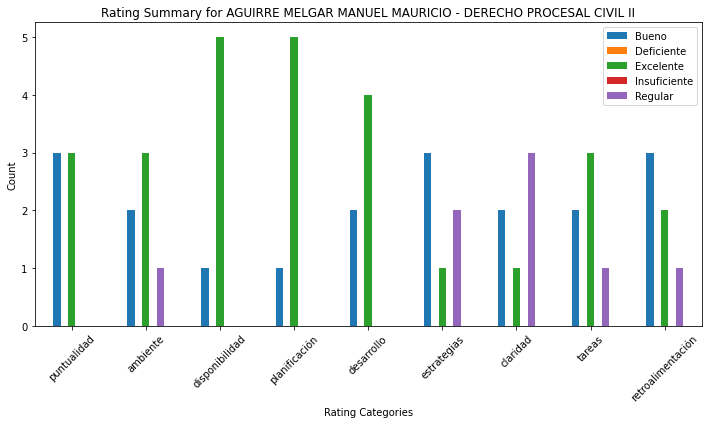

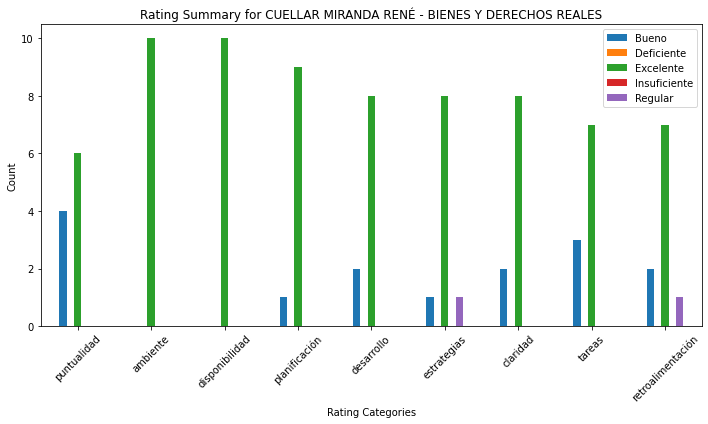

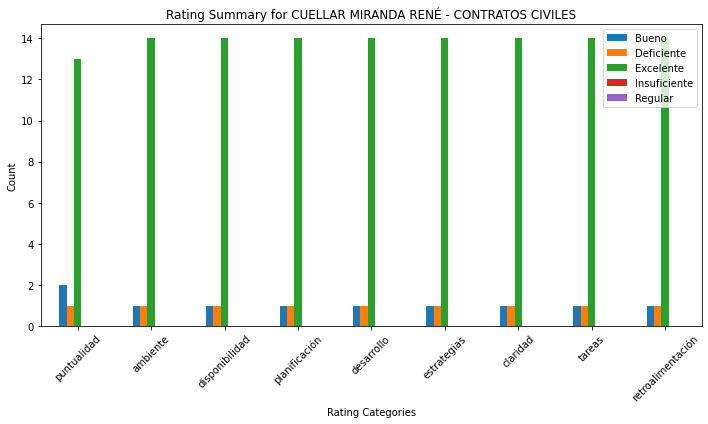

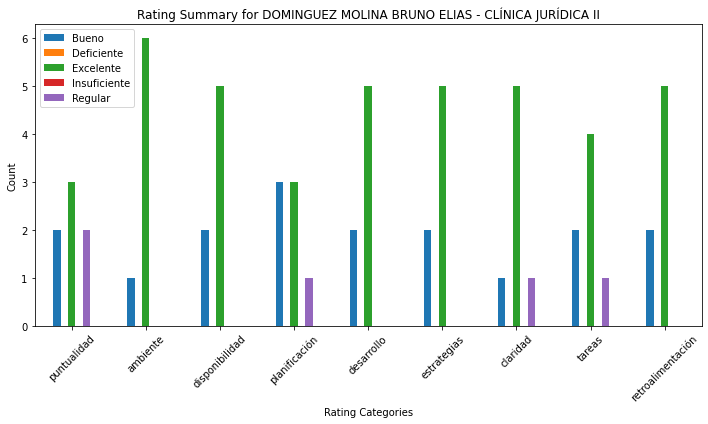

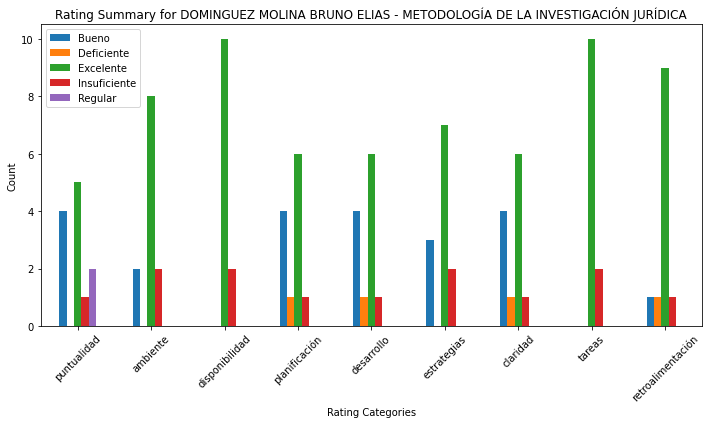

In [58]:
import matplotlib.pyplot as plt

for (docente, asignatura), row in rating_summary.iterrows():
    ratings = row.unstack()
    
    # Plot the data
    ratings.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Rating Summary for {docente} - {asignatura}')
    plt.xlabel('Rating Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:
general_evaluation_counts

evaluacion_docente_general                                               Bueno  \
DOCENTE                        ASIGNATURA                                        
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                     3   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                      2   
                               CONTRATOS CIVILES                             1   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                           3   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA      4   

evaluacion_docente_general                                               Excelente  \
DOCENTE                        ASIGNATURA                                            
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                         2   
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                          8   
                               CONTRATOS CIVILES                                15   
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                               4   
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA          7   

evaluacion_docente_general                                               Regular  
DOCENTE                        ASIGNATURA                                         
AGUIRRE MELGAR MANUEL MAURICIO DERECHO PROCESAL CIVIL II                       1  
CUELLAR MIRANDA RENÉ           BIENES Y DERECHOS REALES                        0  
                               CONTRATOS CIVILES                               0  
DOMINGUEZ MOLINA BRUNO ELIAS   CLÍNICA JURÍDICA II                             0  
                               METODOLOGÍA DE LA INVESTIGACIÓN JURÍDICA        1

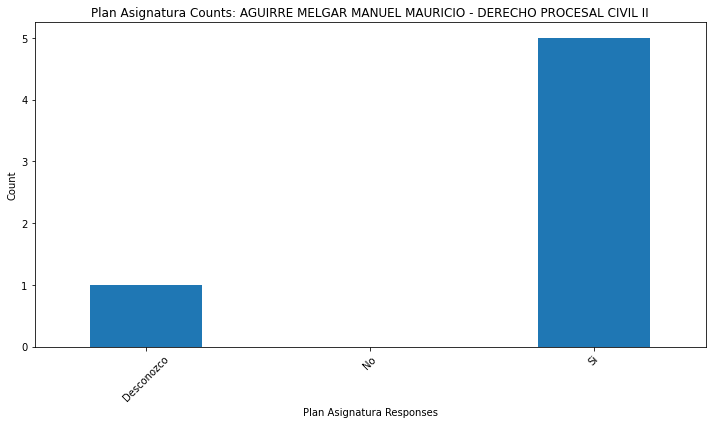

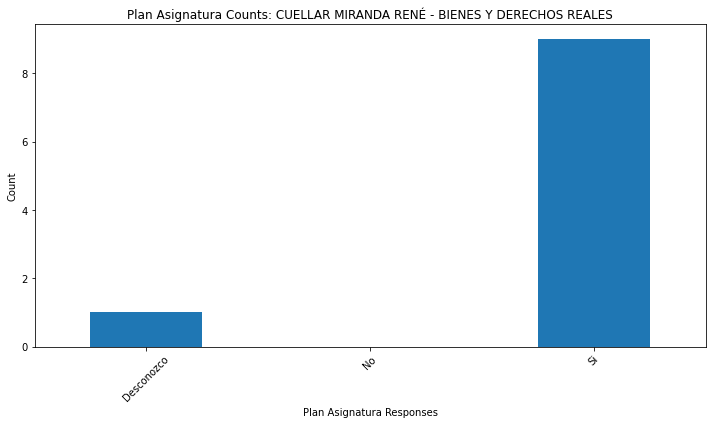

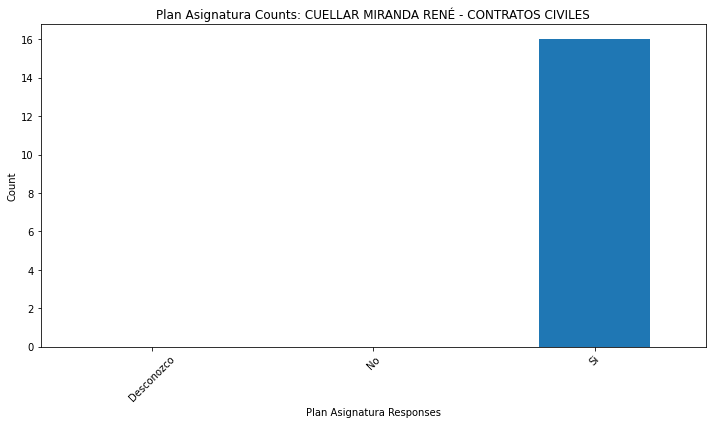

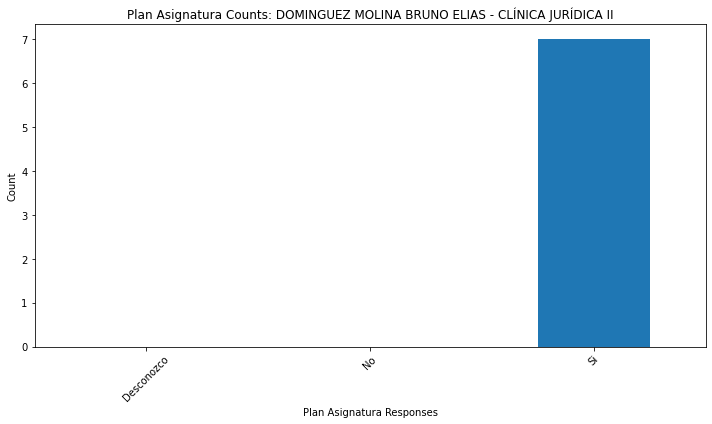

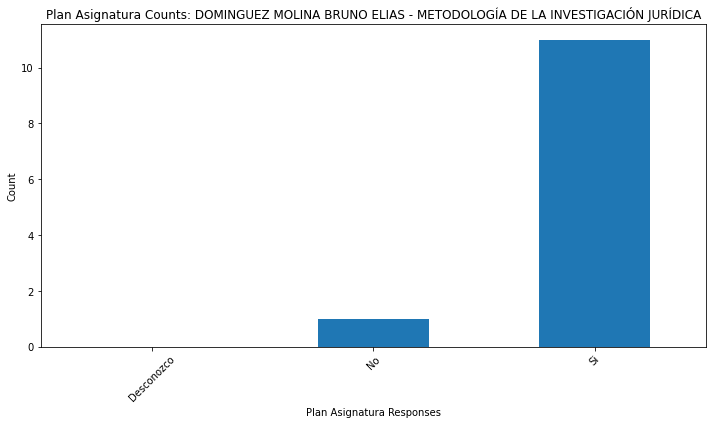

In [60]:
# Group by DOCENTE and ASIGNATURA, and count occurrences of each rating in plan_asignatura
plan_asignatura_counts = data.groupby(['DOCENTE', 'ASIGNATURA'])['plan_asignatura'].value_counts().unstack(fill_value=0)

# Plot the data
for (docente, asignatura), row in plan_asignatura_counts.iterrows():
    row.plot(kind='bar', figsize=(10, 6), title=f'Plan Asignatura Counts: {docente} - {asignatura}')
    plt.xlabel('Plan Asignatura Responses')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

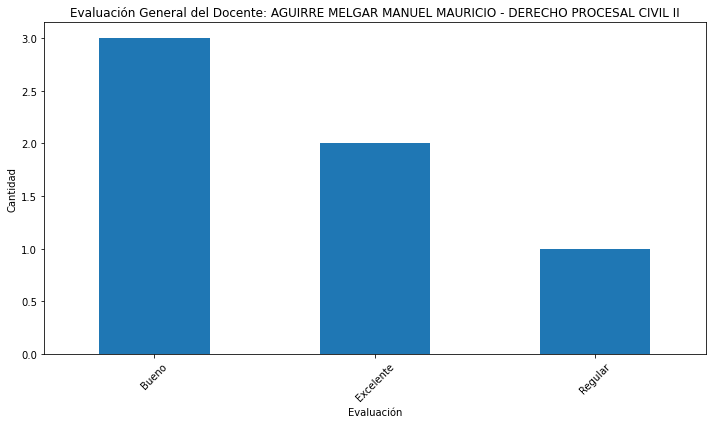

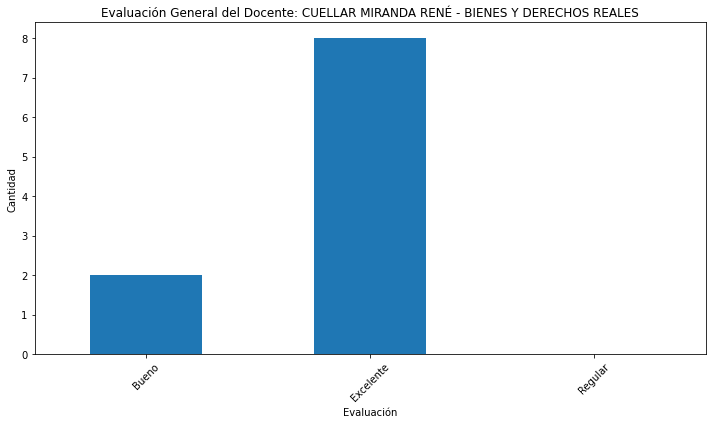

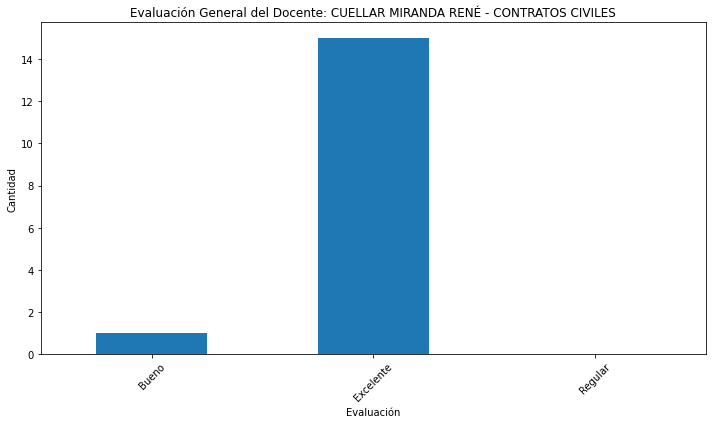

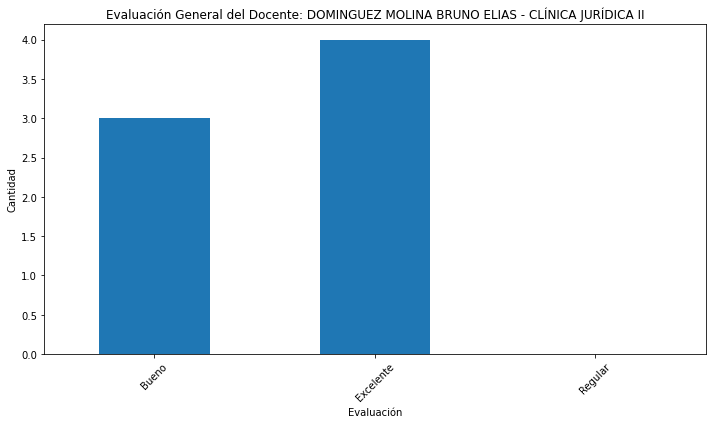

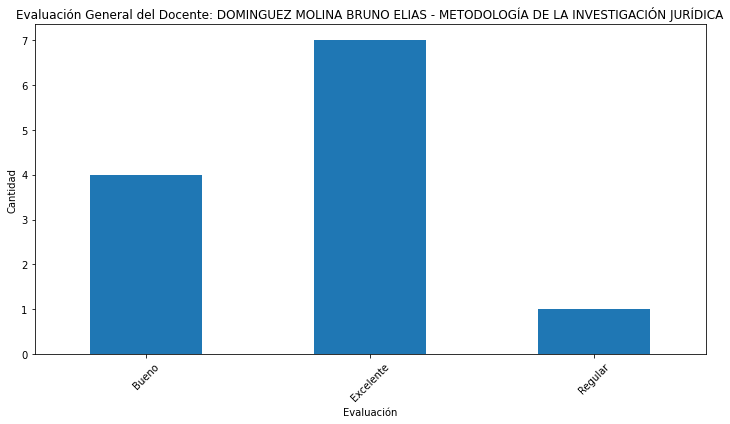

In [61]:
# Group by DOCENTE and ASIGNATURA, and count occurrences of each rating in evaluacion_docente_general
general_evaluation_counts = data.groupby(['DOCENTE', 'ASIGNATURA'])['evaluacion_docente_general'].value_counts().unstack(fill_value=0)

# Plot the data
for (docente, asignatura), row in general_evaluation_counts.iterrows():
    row.plot(kind='bar', figsize=(10, 6), title=f'Evaluación General del Docente: {docente} - {asignatura}')
    plt.xlabel('Evaluación')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [62]:
"""
3. EN GENERAL, ¿CÓMO EVALUARÍAS EL DESEMPEÑO DEL DOCENTE?

Excelente
Bueno
Regular
Algo definciente
Totalmente deficiente
"""

'\n3. EN GENERAL, ¿CÓMO EVALUARÍAS EL DESEMPEÑO DEL DOCENTE?\n\nExcelente\nBueno\nRegular\nAlgo definciente\nTotalmente deficiente\n'

In [63]:
# 4. MENCIONA ASPECTOS POSITIVOS Y/O ASPECTOS EN LOS QUE EL DOCENTE NECESITA TRABAJAR PARA MEJORAR SU DESEMPEÑO.

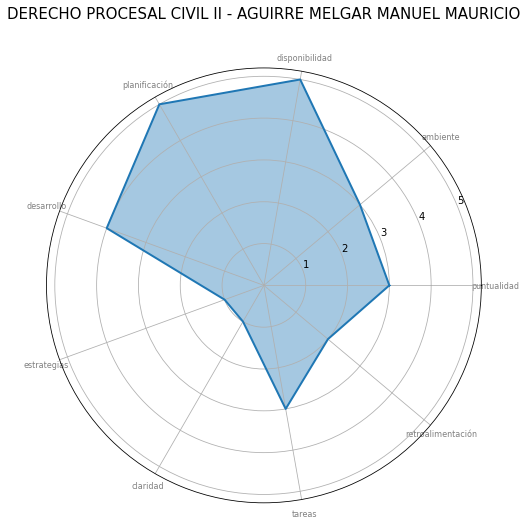

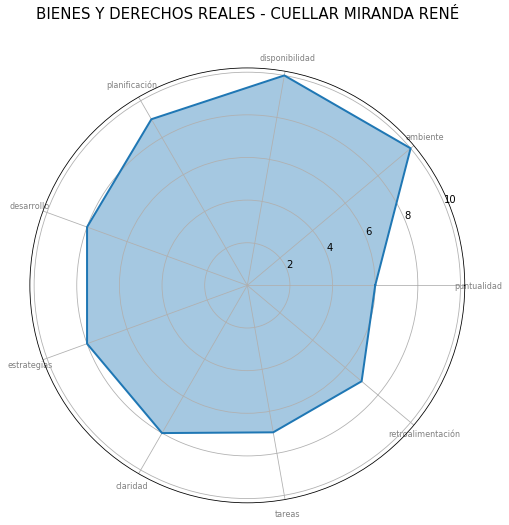

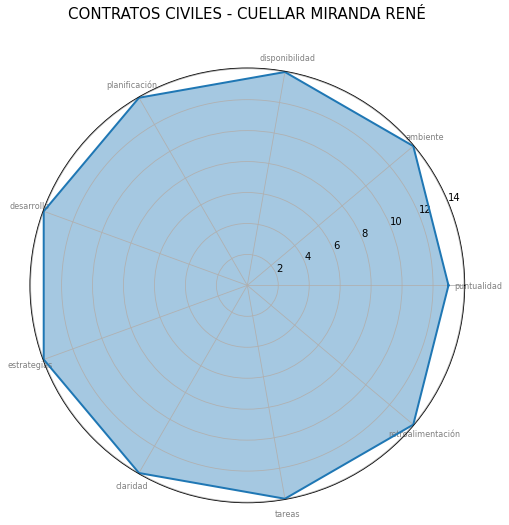

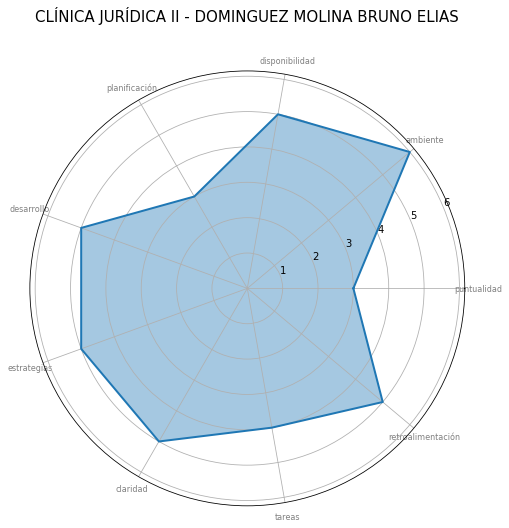

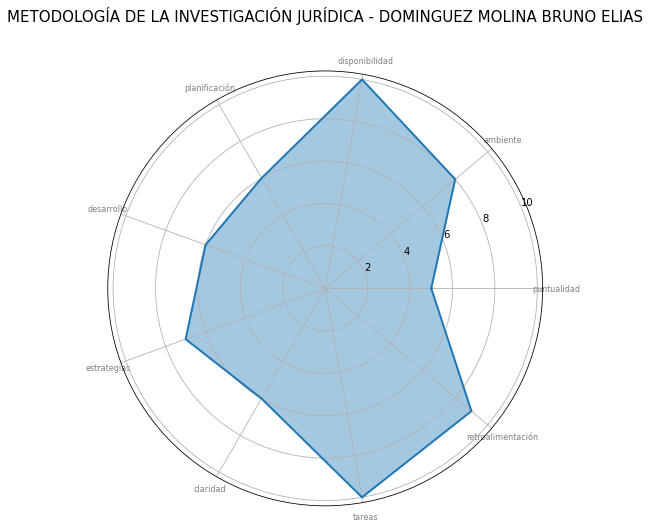

In [64]:
from math import pi

# Iterate through each ASIGNATURA in rating_summary
for (docente, asignatura), row in rating_summary.iterrows():
    # Prepare data for the radar chart
    categories = [col for col in row.index.levels[0]]  # Extract column names (puntualidad, ambiente, etc.)
    values = row.xs('Excelente', level=1).values.tolist()  # Use 'Excelente' ratings as an example
    values += values[:1]  # Close the radar chart loop

    # Create the radar chart
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)

    # Add title
    plt.title(f'{asignatura} - {docente}', size=15, color='black', y=1.1)
    plt.show()

In [ ]:
import requests
import json

# Group by DOCENTE and ASIGNATURA, and concatenate comentarios
comentarios_summary = data.groupby(['DOCENTE', 'ASIGNATURA'])['comentarios'].apply(lambda x: '.'.join(x.dropna())).reset_index()

# Iterate through each group and generate a summary using the LLM API
url = "http://localhost:1147/generate"
headers = {
    "accept": "application/json",
    "Content-Type": "application/json"
}

for _, row in comentarios_summary.iterrows():
    docente = row['DOCENTE']
    asignatura = row['ASIGNATURA']
    comentarios_text = row['comentarios']
    
    payload = {
        "model": "deepseek-r1:8b",
        "prompt": f"Resume los siguientes comentarios para el docente {docente} en la asignatura {asignatura}: \n\n{comentarios_text}",
        "stream": False
    }
    
    response = requests.post(url, json=payload, headers=headers)
    
    if response.status_code == 200:
        response_text = response.text
        data_res = json.loads(response_text)
        summary = data_res["response"]
        print(f"Summary for {docente} - {asignatura}:\n{summary}\n")
    else:
        print(f"Failed to generate summary for {docente} - {asignatura}. Status code: {response.status_code}")

In [65]:
comentarios_summary = data.groupby(['DOCENTE', 'ASIGNATURA'])['comentarios'].apply(lambda x: '\n'.join(x.dropna())).reset_index()
comentario1 = comentarios_summary["comentarios"].iloc[0]

comentario1

'Diapositivas más explicativas\n La verdad que es un buen docente explica muy bien su área \nCumple con su plan de asignatura, debería no usar lenguaje muy técnico pero dentro de todo es buen docente.\nUna sugerencia seria el uso de practicas, con el fin de que se apliquen los conocimientos adquiridos en clases.\nModalidad de evaluación confusa, mejorar temas y contenidos que puedan servir al momento de dar exámenes y/o tareas '

In [66]:
import json
import requests
import re
# Extract the 'comentarios' column as a list of strings
comentarios_summary = data.groupby(['DOCENTE', 'ASIGNATURA'])['comentarios'].apply(lambda x: '\n'.join(x.dropna())).reset_index()
comentario1 = comentarios_summary["comentarios"].iloc[0]

# Define the payload for the Ollama API
url = "http://localhost:11434/api/generate"

prompt = f"""
Eres un asistente encargado de analizar comentarios de estudiantes sobre profesores y asignaturas.
Tu tarea es leer los siguientes comentarios y generar un resumen conciso de los puntos clave mencionados.

**Instrucción Importante: La respuesta DEBE estar escrita exclusivamente en español.**

Comentarios de los estudiantes:
{comentario1}

Usa HTML tags en lugar de sintaxis Markdown para dar formato a la respuesta.
Resumen en español de los puntos clave:
"""
payload = {
    "model": "deepseek-r1:8b",
    "prompt": prompt,
    "temperature": 0.1,
    "stream": False
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    response_text = response.text
    data_res = json.loads(response_text)
    actual_response = data_res["response"]
    cleaned_response = re.sub(r'<think>.*?</think>', '', actual_response, flags=re.DOTALL).strip()

    print(cleaned_response)
else:
    print(f"Failed to generate summary. Status code: {response.status_code}")
    print(response.text)

<b>Resumen de los comentarios de los estudiantes:</b>

1. **Enseñanza Clara y Efectiva**:  
   Los estudiantes destacan que el profesor explica bien su área y cumple con el plan de asignatura, aunque sugieren reducir el uso de lenguaje técnicamente complejo.

2. **Falta de Prácticas Clase**:  
   Se menciona la necesidad de incluir prácticas en las clases para aplicar los conocimientos adquiridos.

3. **Modalidad de Evaluación Confusa**:  
   Existe cierta confusión sobre la modalidad de evaluación, lo que podría afectar la preparación de los estudiantes.

4. **Sugeros para Mejora**:  
   Se recomienda mejorar los temas y contenidos de las tareas y exámenes para asegurar su relevancia y facilitar el aprendizaje.


In [67]:
import re

# Remove the <think> tag and its content
cleaned_response = re.sub(r'<think>.*?</think>', '', actual_response, flags=re.DOTALL).strip()

print(cleaned_response)

<b>Resumen de los comentarios de los estudiantes:</b>

1. **Enseñanza Clara y Efectiva**:  
   Los estudiantes destacan que el profesor explica bien su área y cumple con el plan de asignatura, aunque sugieren reducir el uso de lenguaje técnicamente complejo.

2. **Falta de Prácticas Clase**:  
   Se menciona la necesidad de incluir prácticas en las clases para aplicar los conocimientos adquiridos.

3. **Modalidad de Evaluación Confusa**:  
   Existe cierta confusión sobre la modalidad de evaluación, lo que podría afectar la preparación de los estudiantes.

4. **Sugeros para Mejora**:  
   Se recomienda mejorar los temas y contenidos de las tareas y exámenes para asegurar su relevancia y facilitar el aprendizaje.


In [72]:
!pip install markdown

     |████████████████████████████████| 106 kB 1.2 MB/s eta 0:00:01


In [73]:

import markdown
html = markdown.markdown(cleaned_response)
html

'<p><b>Resumen de los comentarios de los estudiantes:</b></p>\n<ol>\n<li>\n<p><strong>Enseñanza Clara y Efectiva</strong>:<br />\n   Los estudiantes destacan que el profesor explica bien su área y cumple con el plan de asignatura, aunque sugieren reducir el uso de lenguaje técnicamente complejo.</p>\n</li>\n<li>\n<p><strong>Falta de Prácticas Clase</strong>:<br />\n   Se menciona la necesidad de incluir prácticas en las clases para aplicar los conocimientos adquiridos.</p>\n</li>\n<li>\n<p><strong>Modalidad de Evaluación Confusa</strong>:<br />\n   Existe cierta confusión sobre la modalidad de evaluación, lo que podría afectar la preparación de los estudiantes.</p>\n</li>\n<li>\n<p><strong>Sugeros para Mejora</strong>:<br />\n   Se recomienda mejorar los temas y contenidos de las tareas y exámenes para asegurar su relevancia y facilitar el aprendizaje.</p>\n</li>\n</ol>'

In [68]:
url = "http://localhost:11434/api/generate"

payload = {
    "model": "deepseek-r1:8b",
    "prompt": f"why is the sky blue?",
    "stream": False
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)


In [69]:
import json
response_text = response.text
data_res = json.loads(response_text)
actual_response = data_res["response"]
print(actual_response)

<think>

</think>

The sky appears blue due to the scattering of sunlight by molecules and particles in the Earth's atmosphere. This phenomenon, known as Rayleigh scattering, is most effective for blue light because its wavelength is shorter, allowing it to scatter more efficiently off smaller particles. Specifically:

1. **Sunlight Composition**: Sunlight consists of photons with different wavelengths, with blue photons having a shorter wavelength (around 400-500 nm).
2. **Rayleigh Scattering**: When sunlight enters the atmosphere, its photons interact with air molecules and small particles like dust or water droplets. The shorter blue photons are scattered more effectively, leading to a higher concentration of blue light at the Earth's surface compared to longer wavelengths like red or orange.
3. **Scattered Light**: The scattered blue photons then contribute to the sky's appearance, making it seem blue during the day.

This effect is stronger at shorter heights above the Earth's sur

In [70]:
data_res

{'model': 'deepseek-r1:8b',
 'created_at': '2025-04-03T13:15:22.36914Z',
 'response': "<think>\n\n</think>\n\nThe sky appears blue due to the scattering of sunlight by molecules and particles in the Earth's atmosphere. This phenomenon, known as Rayleigh scattering, is most effective for blue light because its wavelength is shorter, allowing it to scatter more efficiently off smaller particles. Specifically:\n\n1. **Sunlight Composition**: Sunlight consists of photons with different wavelengths, with blue photons having a shorter wavelength (around 400-500 nm).\n2. **Rayleigh Scattering**: When sunlight enters the atmosphere, its photons interact with air molecules and small particles like dust or water droplets. The shorter blue photons are scattered more effectively, leading to a higher concentration of blue light at the Earth's surface compared to longer wavelengths like red or orange.\n3. **Scattered Light**: The scattered blue photons then contribute to the sky's appearance, making